In [17]:
from matplotlib import pyplot as plt
import numpy as np
from skimage import color
from skimage import io

In [18]:
def mirror_padding(img,ksn):
    m2 = np.flipud(img)
    m2o = m2[-ksn:,:]
    m2u = m2[:ksn,:]
    m1 = np.fliplr(m2)
    m1ol=m1[-ksn:,-ksn:]
    m1ul=m1[:ksn,-ksn:]
    m1ur=m1[:ksn,:ksn]
    m1or=m1[-ksn:,:ksn]
    m3 = np.fliplr(img)
    m3l= m3[:,-ksn:]
    m3r= m3[:,:ksn]

    imgn=np.zeros((len(img)+2*ksn,len(img[0])+2*ksn))
    imgn[0:ksn,0:ksn]=m1ol
    imgn[ksn:-ksn,0:ksn]=m3l
    imgn[-ksn:,:ksn]=m1ul
    imgn[-ksn:,ksn:-ksn]=m2u
    imgn[-ksn:,-ksn:]=m1ur
    imgn[ksn:-ksn,-ksn:]=m3r
    imgn[0:ksn,-ksn:]=m1or
    imgn[0:ksn,ksn:-ksn]=m2o
    imgn[ksn:-ksn,ksn:-ksn]=img
    return imgn


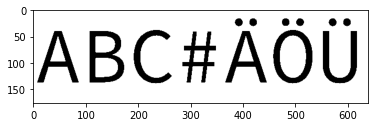

In [19]:
def neighbours(a,b,mat,s):
    neighbors = [mat[i][j] for i in range(a-s, a+s+1) for j in range(b-s, b+s+1)]
    return neighbors

def erosion(mat,se):
    if se == mat:
        return True

def dialtion(mat):
    if np.array(mat).sum()!=0:
        return True

        


imgi = io.imread('Test.png')[:,:,:3]
imgg = color.rgb2gray(imgi)
halfmax = np.max(imgg)/2
imgbw=np.where(imgg>halfmax, 255, 0)
plt.imshow(imgbw,cmap="gray")

In [20]:
kernelsize = 3

if kernelsize%2==1:
    ks=kernelsize
ksn=int((ks-1)/2)

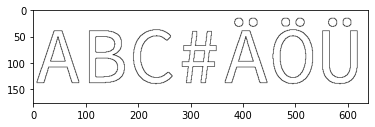

In [21]:
img = mirror_padding(imgbw,ksn)
se = list(np.full(kernelsize**2,255))
newimg = np.zeros((len(imgbw),len(imgbw[0])))
for a in range(len(newimg)):
    for b in range(len(newimg[0])):
        if erosion(neighbours(a+ksn,b+ksn,img,ksn),se):
            newimg[a,b]=255
boundary = newimg-imgbw
plt.imshow(boundary,cmap="gray")

In [22]:
kernelsize2 = 7

if kernelsize%2==1:
    ks2=kernelsize2
ksn2=int((ks2-1)/2)

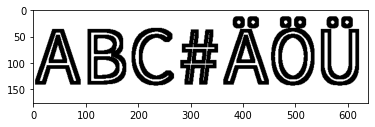

In [24]:
boundarymirr = mirror_padding(boundary,ksn2)
newimg2 = np.zeros((len(boundary),len(boundary[0])))
for a in range(len(newimg2)):
    for b in range(len(newimg2[0])):
        if dialtion(neighbours(a+ksn2,b+ksn2,boundarymirr,ksn2)):
            newimg2[a,b]=255
plt.imshow(1-newimg2,cmap="gray")